### Ex 1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#https://github.com/dusicastepic/ADMSecondHomework

def dateparse(time_in_secs):
    return pd.to_datetime(time_in_secs, unit='s')

In [3]:
df = pd.read_csv('./steam_reviews.csv', header='infer',
parse_dates=['timestamp_created',
'timestamp_updated', 'author.last_played'],
nrows = 400000,
date_parser=dateparse)
df

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,2021-01-22 19:23:03
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,2021-01-23 07:18:27
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,2021-01-23 06:36:17
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",2021-01-23 05:32:50,2021-01-23 05:32:50,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,2021-01-23 06:35:44
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,2021-01-23 05:23:47,2021-01-23 05:23:47,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,2021-01-16 09:10:49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,399995,292030,The Witcher 3: Wild Hunt,27964696,russian,"Первая часть игры хоть и не была шедевром,но з...",2016-11-28 16:14:06,2016-11-28 16:14:06,True,0,...,True,False,False,76561198027981363,229,3,8893.0,0.0,2482.0,2020-11-22 11:21:09
399996,399996,292030,The Witcher 3: Wild Hunt,27964657,english,It's a mastapiece!,2016-11-28 16:13:46,2016-11-28 16:13:46,True,1,...,True,False,False,76561198027372749,343,2,886.0,0.0,883.0,2020-05-17 13:00:44
399997,399997,292030,The Witcher 3: Wild Hunt,27964659,russian,Лучшая история за последние пять лет,2016-11-28 16:13:45,2016-11-28 16:13:45,True,0,...,True,False,False,76561198022399495,215,1,12466.0,0.0,11886.0,2018-10-02 15:21:18
399998,399998,292030,The Witcher 3: Wild Hunt,27964518,schinese,我能怎么办，我也很绝望啊。我不喜欢打牌啊，但是莫名的就是想成为昆特牌大师,2016-11-28 16:12:37,2016-11-28 16:12:37,True,0,...,False,False,False,76561198262527886,111,1,4134.0,0.0,3801.0,2017-07-25 14:06:28


In [9]:
df[df.index == 376209]

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
376209,376209,292030,The Witcher 3: Wild Hunt,32891513,english,One of the best gaming experiences you will ev...,2017-06-27 21:47:27,2017-06-27 21:47:27,True,1,...,True,False,False,76561197980195272,280,10,14038.0,0.0,11867.0,2019-09-03 02:19:14


In [31]:
df.app_name.groupby(df['review']).value_counts()

review                                                                            app_name                
\t\nCiri                                                                          The Witcher 3: Wild Hunt     1
\n                                                                                The Witcher 3: Wild Hunt    17
\n\n                                                                              The Witcher 3: Wild Hunt     2
\n\n\n\n                                                                          The Witcher 3: Wild Hunt     1
\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n  The Witcher 3: Wild Hunt     1
                                                                                                              ..
🤤                                                                                 The Witcher 3: Wild Hunt     1
🤩                                                                                 The Witcher 3: Wild 

In [13]:
# First of all, in order to understand the relationship among various data, it can be useful to study the 
# correlation coefficient between the variables of the dataset 'df'.
# We will search the values and we will look at the most specific ones and then we will
# visualize them in their scatter plots.
df.corr()

,Unnamed: 0,app_id,review_id,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
Unnamed: 0,1.000000,NaN,-0.999054,0.005804,0.001366,0.003105,0.026348,0.009554,0.001595,-0.000354,NaN,-0.064852,0.034798,0.032007,0.090080,-0.277194,0.026532
app_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_id,-0.999054,NaN,1.000000,-0.005007,-0.001041,-0.003023,-0.026014,-0.009291,-0.001642,0.000331,NaN,0.062467,-0.033045,-0.032197,-0.089149,0.270378,-0.024910
recommended,0.005804,NaN,-0.005007,1.000000,-0.008511,-0.023555,-0.235256,-0.071995,0.009428,-0.000223,NaN,0.015488,-0.037598,-0.049991,0.066030,0.025206,0.050697
votes_helpful,0.001366,NaN,-0.001041,-0.008511,1.000000,0.524991,0.166226,0.433383,-0.007745,0.003728,NaN,-0.006149,0.028834,0.027796,0.034400,0.000422,0.036064
votes_funny,0.003105,NaN,-0.003023,-0.023555,0.524991,1.000000,0.099557,0.153696,-0.010954,0.002593,NaN,0.003404,0.009813,0.010042,0.014711,0.000556,0.016652
weighted_vote_score,0.026348,NaN,-0.026014,-0.235256,0.166226,0.099557,1.000000,0.109180,-0.025598,0.015877,NaN,-0.029928,0.101574,0.087755,0.029946,-0.013120,0.037747
comment_count,0.009554,NaN,-0.009291,-0.071995,0.433383,0.153696,0.109180,1.000000,-0.007814,0.009697,NaN,-0.006478,0.041208,0.047380,0.010988,-0.004323,0.013937
steam_purchase,0.001595,NaN,-0.001642,0.009428,-0.007745,-0.010954,-0.025598,-0.007814,1.000000,-0.070171,NaN,0.017008,-0.047719,-0.028140,0.006064,0.007043,-0.001621
received_for_free,-0.000354,NaN,0.000331,-0.000223,0.003728,0.002593,0.015877,0.009697,-0.070171,1.000000,NaN,0.035240,-0.010859,0.002820,-0.016070,0.004492,-0.018492


(0.0, 876642.65)

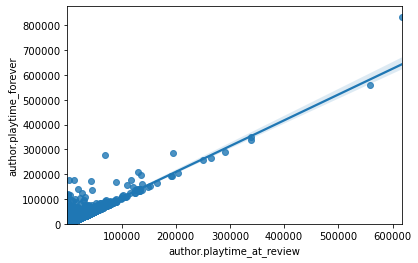

In [15]:
sns.regplot(y = 'author.playtime_forever', x = 'author.playtime_at_review', data = df)
plt.ylim(0,)

# As we can see, the correlation coefficient between 'author.playtime_forever' and 'author.playtime_at_review' is 0.903066. 
# This value suggests a strong positive correlation, which means that 
# the values of the two variables tend to increase simoultaneusly.

(0.0, 3019.4452474876225)

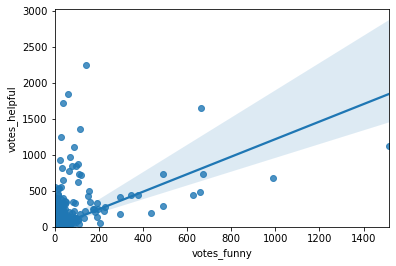

In [19]:
sns.regplot(y = 'votes_helpful', x = 'votes_funny', data = df)
plt.ylim(0,)

# This correlation's value is 0.524991, so we can define it as a correlation of medium strength.
# Anyway the presence of some outliers induces us to think that this outcome
# could be wrong.
# It could be interesting to analyze it.

(0.0, 1.05)

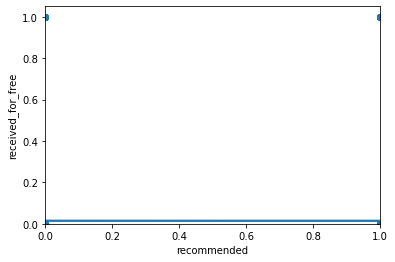

In [21]:
sns.regplot(y = 'received_for_free', x = 'recommended', data = df)
plt.ylim(0,)

# We analyze this case because it shows the lowest correlation value.
# In this case the correlation coefficient's value is -0.000223: this means that there's a negative weak correlation
# between the variables, and this is clear looking at the scatter plot.
# Having a negative correlations means that while the value of one variable tends to increase,
# the other one decreases.
# Anyway we must notice the presence of some outliars, which could possibly tell us that this 
# value is wrong.

In [ ]:
sns.boxplot(x = 'weighted_vote_score', y = 'review_id', data = df ) #non va bene!!!!

In [27]:
df.describe()

,Unnamed: 0,app_id,review_id,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
count,100000.000000,100000.0,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,292030.0,7.745769e+07,0.917220,0.261350,0.087079,0.038830,7.656120e+16,72.093550,6.838510,6484.811020,202.469840,4658.942740
std,28867.657797,0.0,4.569945e+06,19.467835,8.392454,0.195308,0.749672,3.680653e+08,168.222493,21.225394,8298.137737,737.850082,7205.417946
min,0.000000,292030.0,6.986958e+07,0.000000,0.000000,0.000000,0.000000,7.656120e+16,0.000000,1.000000,5.000000,0.000000,5.000000
25%,24999.750000,292030.0,7.324672e+07,0.000000,0.000000,0.000000,0.000000,7.656120e+16,16.000000,2.000000,2164.000000,0.000000,784.000000
50%,49999.500000,292030.0,7.754843e+07,0.000000,0.000000,0.000000,0.000000,7.656120e+16,36.000000,3.000000,4847.000000,0.000000,2698.000000
75%,74999.250000,292030.0,8.144077e+07,0.000000,0.000000,0.000000,0.000000,7.656120e+16,79.000000,7.000000,8442.000000,1.000000,6246.000000
max,99999.000000,292030.0,8.518560e+07,2252.000000,1517.000000,0.986162,102.000000,7.656120e+16,17197.000000,2627.000000,834898.000000,20120.000000,617661.000000


In [28]:
df['weighted_vote_score'].value_counts() #counts the uniques 

0.000000    83168
0.523810     7296
0.476190     1180
0.521739      754
0.545455      702
            ...  
0.487492        1
0.497175        1
0.490631        1
0.454023        1
0.695291        1
Name: weighted_vote_score, Length: 3466, dtype: int64

In [29]:
df['author.playtime_forever'].value_counts() #another example

302.0      29
258.0      29
7.0        29
333.0      28
358.0      28
           ..
21762.0     1
17312.0     1
15468.0     1
14563.0     1
17919.0     1
Name: author.playtime_forever, Length: 20146, dtype: int64

C:\Users\Letizia Russo\Downloads\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


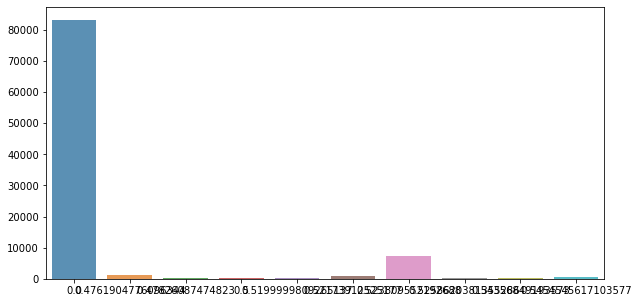

In [36]:
Monthly_Charges_Count = df.weighted_vote_score.value_counts(sort=True).nlargest(10)
plt.figure(figsize=(10,5))
sns.barplot(Monthly_Charges_Count.index, Monthly_Charges_Count.values, alpha=0.8)
plt.show()